In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
# finding missing values
df.isnull().sum()
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

<AxesSubplot: >

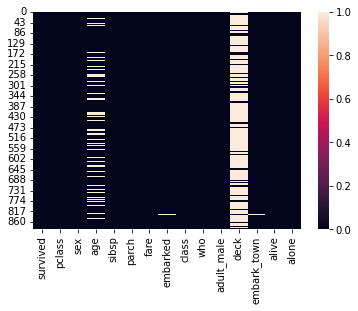

In [47]:
sns.heatmap(df.isnull())

In [48]:
#df['embark_town'].unique()
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [49]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [50]:
# grouping fare data on the basis of sex
df.groupby('sex')['fare'].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [51]:
df.groupby(['survived', 'who'])['fare'].size()

survived  who  
0         child     34
          man      449
          woman     66
1         child     49
          man       88
          woman    205
Name: fare, dtype: int64

In [52]:
# correlation matrix
df[['fare', 'age', 'sibsp', 'parch']].corr()

,fare,age,sibsp,parch
fare,1.000000,0.096067,0.159651,0.216225
age,0.096067,1.000000,-0.308247,-0.189119
sibsp,0.159651,-0.308247,1.000000,0.414838
parch,0.216225,-0.189119,0.414838,1.000000


In [53]:
df.select_dtypes(include=['number']).corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [54]:
corr_df = df[['fare', 'age', 'sibsp', 'parch']].corr()

<AxesSubplot: >

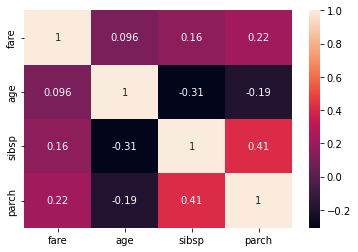

In [55]:
sns.heatmap(corr_df, annot=True)

In [56]:
# dropping the deck column since it has maximum missing values
df.drop('deck', axis=1, inplace=True)

In [58]:
df['age'].fillna(df['age'].mean(), inplace=True)


In [59]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [60]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [61]:
# features engineering
bins = [0, 2, 5, 12, 18, 30, 50, 80]
labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Youngs', 'Middle Aged', 'Old']
df_binned_age = pd.cut(df['age'], bins=bins, labels=labels)
df_binned_age

0           Youngs
1      Middle Aged
2           Youngs
3      Middle Aged
4      Middle Aged
          ...     
886         Youngs
887         Youngs
888         Youngs
889         Youngs
890    Middle Aged
Name: age, Length: 891, dtype: category
Categories (7, object): ['Infants' < 'Toddlers' < 'Kids' < 'Teens' < 'Youngs' < 'Middle Aged' < 'Old']

In [62]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [63]:
df['binned_age'] = df_binned_age
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged
